# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [106]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [107]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [108]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [109]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [110]:
assert g(0) == 0.

In [111]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [112]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [113]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [114]:

def integrate_numeric(xmin, xmax, N):
    Delx=(xmax-xmin)/N
    xsum=0
    msum=0
    w=xmin
    m= xmin +Delx/2
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    
    for i in range (0,N):
        xsum = xsum + f(w)
        w = w + Delx
    
    for j in range (0,N):
        msum = msum + f(m)
        m = m + Delx
    integral = Delx/6 * (4*msum +2*xsum+f(xmax))
    print(integral)
    return integral

    
    


Make sure you have implemented Simpson's rule correctly:

In [115]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

1.6266126028560373


In [116]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

1.096590995599084


## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


2.4690909838319284
2.469459200257431
2.4694818744619678
2.469483286359016
2.469483374520932
2.469483380029777
2.4694833803740606
2.469483380395576
2.4694833803969223


Text(0.5,1,'A log-log plot depicting how the Fractional error varies with the Number of Panels used')

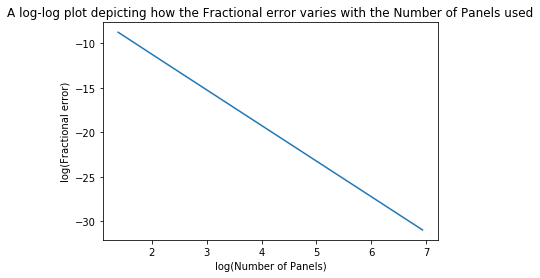

In [118]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = (4, 8, 16, 32, 64, 128, 256, 512, 1024)  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
def Frac(xmin, xmax, N):
    ans = (abs(((result_analytic)-integrate_numeric(xmin, xmax, N))/result_analytic))
    return ans
frac0 =Frac(x0,x1,panel_counts[0])
frac1 =Frac(x0,x1,panel_counts[1])
frac2 =Frac(x0,x1,panel_counts[2])
frac3 =Frac(x0,x1,panel_counts[3])
frac4 =Frac(x0,x1,panel_counts[4])
frac5 =Frac(x0,x1,panel_counts[5])
frac6 =Frac(x0,x1,panel_counts[6])
frac7 =Frac(x0,x1,panel_counts[7])
frac8 =Frac(x0,x1,panel_counts[8])
xvalues = [numpy.log(4),numpy.log(8),numpy.log(16),numpy.log(32),numpy.log(64),numpy.log(128),numpy.log(256),numpy.log(512),numpy.log(1024),]
yvalues = [numpy.log(frac0),numpy.log(frac1),numpy.log(frac2),numpy.log(frac3),numpy.log(frac4),numpy.log(frac5),numpy.log(frac6),numpy.log(frac7),numpy.log(frac8),]

plt.plot(xvalues,yvalues)
plt.xlabel("log(Number of Panels)")
plt.ylabel("log(Fractional error)")
plt.title("A log-log plot depicting how the Fractional error varies with the Number of Panels used")









What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Simpson's method utilises the idea that a quadratic curve passing through three points of the original function can be used to approximate the original function. This quadratic is much easier to integrate and is used to approximate the original fucntion, if the panel count is small then the quadratic used serves as a poor apprioximation for the original function and hence when integrated, differs a large amount from the integral produced analytically. This is evidenced by the negative relationship shown in the graph above. We see that a larger number of panels leads to a more accurate result, this is because it means the function is approximated by many different quadratic lines. The more quadratic lines used means that a better approximation of the original function is produced and hence a more accurate integration.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The difference between Simpson's rule and the trapezium rule is that instead of approximating the function as a quadratic and then integrating it, the trapezium rule instead calculates the area underneath the function by splitting it into differing amounts of trapezium strips. The area under the function and hence the integral is given as the sum of the area of each trapezium. Since the area is split into trapeiums it means that the function between two sequential x value is approximated as a straight line, this means that the trapezium is similar to Simpson's rule and hence the same pattern is observed with varied panel count. As the panel count is decreased the sum of the trapezium area is a worse representation of the area underneath the function and hence the integral. As the panel count is increased the sum of the trapezium area becomes a better representation of the area under the original function and hence approaches the value calculated analytically 